In [3]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from cvxopt import matrix, solvers
from sklearn.svm import SVC
np.random.seed(22)

In [8]:
means = [[2, 2], [4, 2]]
cov = [[0.3, 0.2], [0.2, 0.3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N) # class 1
X1 = np.random.multivariate_normal(means[1], cov, N) # class -1
X = np.concatenate((X0.T, X1.T), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis=1)

V = np.concatenate((X0.T, -X1.T), axis=1) # V = [y1x1, y2x2,..., yNxN]
K = matrix(V.T.dot(V))

p = matrix(-np.ones((2*N, 1)))

# Gx <= h -> all lambda_n >= 0
G = matrix(-np.eye(2*N)) # for constraint: all lambda_n >= 0
h = matrix(np.zeros((2*N, 1)))

# Ax = b -> y.T.lambda = 0
A = matrix(y)
b = matrix(np.zeros((1, 1))) 

solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

l = np.array(sol['x']) # shape = (1, 20)
print('lambda = ')
print(l)

lambda = 
[[1.04130614e-08]
 [9.74746708e-10]
 [1.77635867e-08]
 [7.29823960e-10]
 [1.00416517e-09]
 [1.86476113e+00]
 [1.53782292e-09]
 [3.65447033e-10]
 [1.34022220e+00]
 [1.84200296e-09]
 [1.16781859e-08]
 [8.08401932e-09]
 [6.76831807e-10]
 [4.85763154e-09]
 [1.75297620e-09]
 [2.25334781e-09]
 [1.40981305e-09]
 [3.97871130e-09]
 [3.20498331e+00]
 [2.24245570e-08]]


In [7]:
epsilon = 1e-6
S = np.where(l > epsilon)[0]

VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
lS = l[S]

# solution found by theory
w1 = VS.dot(lS)
b1 = np.mean(yS.T - w1.T.dot(XS))

print('w =', w1)
print('b =', b1)

# solution found by sklearn
y1 = y.reshape((2*N,))
X1 = X.T
clf =SVC(kernel = 'linear', C=1e5)
clf.fit(X1, y1)

w2 = clf.coef_
b2= clf.intercept_

print('w =', w2)
print('b =', b2)

w = [[-2.31901325]
 [ 1.94358214]]
b = 3.733665551033308
w = [[-2.31901718  1.94358529]]
b = [3.7336714]


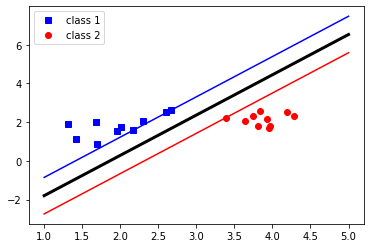

In [21]:
means = [[2, 2], [4, 2]]
cov = [[0.3, 0.2], [0.2, 0.3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N) # class 1
X1 = np.random.multivariate_normal(means[1], cov, N) # class -1
X = np.concatenate((X0, X1), axis = 0)
y = np.concatenate((np.ones((N)), -1*np.ones((N))), axis=0)

clf = SVC(kernel = 'linear', C=1e5)
clf.fit(X, y)

w = clf.coef_
b = clf.intercept_

plt.plot(X0[:, 0], X0[:, 1], 'bs', label='class 1')
plt.plot(X1[:, 0], X1[:, 1], 'ro', label='class 2')
plt.legend()

x1 = np.array([1, 5])
y1 = -w[0, 0]/w[0, 1]*x1 - b/w[0, 1]
y2 = -w[0, 0]/w[0, 1]*x1 - (b-1)/w[0, 1]
y3 = -w[0, 0]/w[0, 1]*x1 - (b+1)/w[0, 1]
plt.plot(x1, y1, 'k', linewidth = 3)
plt.plot(x1, y2, 'b')
plt.plot(x1, y3, 'r')

plt.show()